<a href="https://colab.research.google.com/github/flybiubiu/cs231n/blob/master/ConvolutionalNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!git clone https://github.com/Halfish/cs231n.git
%cd cs231n/assignment2
!pip install imageio
%cd cs231n/datasets/
!/content/cs231n/assignment2/cs231n/datasets/get_datasets.sh
%cd '/content/cs231n/assignment2'

fatal: destination path 'cs231n' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'cs231n/assignment2'
/content/cs231n/assignment2
/content/cs231n/assignment2/cs231n/datasets
--2019-11-27 16:44:12--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  13.1MB/s    in 14s     

2019-11-27 16:44:26 (11.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-bat

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

run the following from the cs231n directory and try again:
python setup.py build_ext --inplace
You may also need to restart your iPython kernel


In [11]:
data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [0]:
def conv_forward_naive(x, w, b, conv_param):
  out = None
  pad, stride = conv_param['pad'], conv_param['stride']
  x_padded = np.pad(x, ((0,), (0,), (pad,), (pad,)), 'constant')#np.pad填充
  #print(pad)
  #print(x_padded)
  N, C, H, W = x.shape
  F, C, HH, WW = w.shape
  output_height = 1 + (H + 2 * pad - HH) / stride
  output_width = 1 + (W + 2 * pad - WW) / stride
  out = np.zeros((N, F, output_height, output_width))#注意两个括号
  for i in range(output_height):#arange返回的是一个ndarray
    for j in range(output_width):#而range返回一个list
      x_padded_mask = x_padded[:, :, i * stride: i * stride + HH, j * stride: j * stride + WW]
      for k in range(F):
        out[:, k, i, j] = np.sum(x_padded_mask * w[k, :, : , :], axis = (1, 2, 3))
  out = out + (b)[None, :, None, None]
  cache = (x, w, b, conv_param)
  return out, cache

In [13]:
x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)
conv_param = {'stride': 2, 'pad': 1}
out, _ = conv_forward_naive(x, w, b, conv_param)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                           [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])
print 'Testing conv_forward_naive'
print 'difference: ', rel_error(out, correct_out)

Testing conv_forward_naive
difference:  2.2121476417505994e-08


((266, 400, 3), (517, 517, 3))
67
((266, 400, 3), (517, 517, 3))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


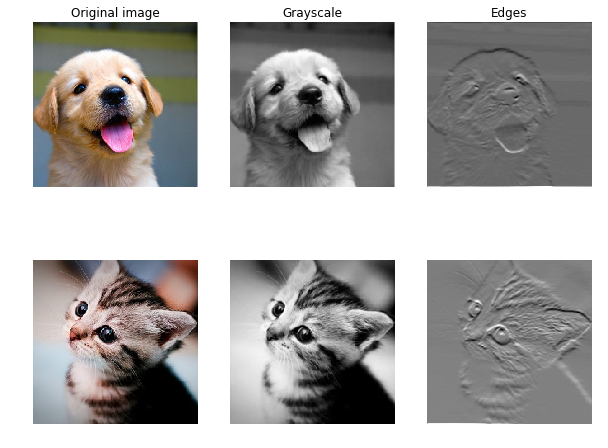

In [14]:
from scipy.misc import imread, imresize
kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')
print(kitten.shape, puppy.shape)
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
print(d//2)
kitten_cropped = kitten[:, d//2:-d//2, :]
print(kitten.shape, puppy.shape)
img_size = 200
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(puppy, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(kitten_cropped, (img_size, img_size)).transpose((2, 0, 1))#转换，channel放前面
# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))
w[0, 0, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]#比例是0.1 0.3 0.6
w[1, 2, :, :] = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
b = np.array([0, 128])
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})
def imshow_noax(img, normalize=True):
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)#压缩
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')
plt.subplot(2, 3, 1)
imshow_noax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_noax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_noax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()

In [0]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_naive(x, w, b, conv_param)[0], b, dout)

In [0]:
def conv_backward_naive(dout, cache):
  dx, dw, db = None, None, None
  x, w, b, conv_param = cache
  N, C, H, W = x.shape
  F, _, HH, WW = w.shape
  stride, pad = conv_param['stride'], conv_param['pad']
  H_out = 1 + (H + 2 * pad - HH) / stride
  W_out = 1 + (W + 2 * pad - WW) / stride
  x_pad = np.pad(x, ((0,), (0,), (pad,), (pad,)), mode='constant', constant_values=0)
  dx = np.zeros_like(x)
  dx_pad = np.zeros_like(x_pad)
  dw = np.zeros_like(w)
  db = np.zeros_like(b)
  db = np.sum(dout, axis = (0,2,3))
  x_pad = np.pad(x, ((0,), (0,), (pad,), (pad,)), mode='constant', constant_values=0)
  for i in range(H_out):
      for j in range(W_out):
          x_pad_masked = x_pad[:, :, i*stride:i*stride+HH, j*stride:j*stride+WW]
          for k in range(F): #compute dw
              dw[k ,: ,: ,:] += np.sum(x_pad_masked * (dout[:, k, i, j])[:, None, None, None], axis=0)
          for n in range(N): #compute dx_pad
              dx_pad[n, :, i*stride:i*stride+HH, j*stride:j*stride+WW] += np.sum((w[:, :, :, :] *
                                                 (dout[n, :, i, j])[:,None ,None, None]), axis=0)
  dx = dx_pad[:,:,pad:-pad,pad:-pad]
  return dx, dw, db

In [17]:
x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(2,)
dout = np.random.randn(4, 2, 5, 5)
conv_param = {'stride': 1, 'pad': 1}

dx_num = eval_numerical_gradient_array(lambda x: conv_forward_naive(x, w, b, conv_param)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: conv_forward_naive(x, w, b, conv_param)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: conv_forward_naive(x, w, b, conv_param)[0], b, dout)

out, cache = conv_forward_naive(x, w, b, conv_param)
dx, dw, db = conv_backward_naive(dout, cache)

# Your errors should be around 1e-9'
print 'Testing conv_backward_naive function'
print 'dx error: ', rel_error(dx, dx_num)
print 'dw error: ', rel_error(dw, dw_num)
print 'db error: ', rel_error(db, db_num)

Testing conv_backward_naive function
dx error:  5.556182658701817e-09
dw error:  9.872359063386604e-11
db error:  1.866849837721655e-11


In [0]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num=np.prod(x_shape)).reshape(x_shape)#np.linspace主要用来创建等差数列
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}
#print(x)

In [0]:
def max_pool_forward_naive(x, pool_param):
  out = None
  N, C, H, W = x.shape
  pool_height, pool_width = pool_param['pool_height'], pool_param['pool_width']
  stride = pool_param['stride']
  out_height = H / pool_height
  out_width = W / pool_width
  out = np.zeros((N, C, out_height, out_width))
  for i in range(out_height):
      for j in range(out_width):
          mask = x[:, :, i*stride:i*stride+pool_height, j*stride:j*stride+pool_width]
          out[:, :, i, j] = np.max(mask, axis=(2, 3))
  cache = (x, pool_param)
  return out, cache

In [20]:
out, _ = max_pool_forward_naive(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

print 'Testing max_pool_forward_naive function:'
print 'difference: ', rel_error(out, correct_out)

Testing max_pool_forward_naive function:
difference:  4.1666665157267834e-08


In [0]:
x = np.random.randn(3, 2, 8, 8)
dout = np.random.randn(3, 2, 4, 4)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

dx_num = eval_numerical_gradient_array(lambda x: max_pool_forward_naive(x, pool_param)[0], x, dout)

out, cache = max_pool_forward_naive(x, pool_param)

In [0]:
def max_pool_backward_naive(dout, cache):
  dx = None
  x, pool_param = cache
  N, C, H, W = x.shape
  pool_height, pool_width = pool_param['pool_height'], pool_param['pool_width']
  stride = pool_param['stride']
  dx = np.zeros_like(x)
  out_height = H / pool_height
  out_width = W / pool_width
  for i in range(out_height):
      for j in range(out_width):
          # x, dx has the same dimension, so does x_mask and dx_mask
          x_mask = x[:, :, i*stride:i*stride+pool_height, j*stride:j*stride+pool_width]
          dx_mask = dx[:, :, i*stride:i*stride+pool_height, j*stride:j*stride+pool_width]
          # flags: only the max value is True, others are False
          flags = np.max(x_mask, axis=(2, 3), keepdims=True) == x_mask
          #print(x_mask.shape)
          #print(((dout[:, :, i, j])).shape)#None 的作用就是在相应的位置上增加了一个维度，在这个维度上只有一个元素
          dx_mask += flags * (dout[:, :, i, j])[:, :, None, None]
  return dx

In [23]:
dx = max_pool_backward_naive(dout, cache)
print 'Testing max_pool_backward_naive function:'
print 'dx error: ', rel_error(dx, dx_num)

Testing max_pool_backward_naive function:
dx error:  3.2756377295933455e-12


In [26]:
from cs231n.fast_layers import max_pool_forward_fast, max_pool_backward_fast
from time import time
x = np.random.randn(100, 3, 32, 32)
dout = np.random.randn(100, 3, 16, 16)
pool_param = {'pool_height': 2, 'pool_width': 2, 'stride': 2}

t0 = time()
out_naive, cache_naive = max_pool_forward_naive(x, pool_param)
t1 = time()
out_fast, cache_fast = max_pool_forward_fast(x, pool_param)
t2 = time()

print 'Testing pool_forward_fast:'
print 'Naive: %fs' % (t1 - t0)
print 'fast: %fs' % (t2 - t1)
print 'speedup: %fx' % ((t1 - t0) / (t2 - t1))
print 'difference: ', rel_error(out_naive, out_fast)

t0 = time()
dx_naive = max_pool_backward_naive(dout, cache_naive)
t1 = time()
dx_fast = max_pool_backward_fast(dout, cache_fast)
t2 = time()

print '\nTesting pool_backward_fast:'
print 'Naive: %fs' % (t1 - t0)
print 'speedup: %fx' % ((t1 - t0) / (t2 - t1))
print 'dx difference: ', rel_error(dx_naive, dx_fast)

Testing pool_forward_fast:
Naive: 0.008179s
fast: 0.002184s
speedup: 3.744679x
difference:  0.0

Testing pool_backward_fast:
Naive: 0.017610s
speedup: 1.645363x
dx difference:  0.0


In [33]:
!pwd
%cd /content/cs231n/assignment2/cs231n/
!ls -al
!python ./setup.py build_ext --inplace

/content/cs231n/assignment2/cs231n
/content/cs231n/assignment2/cs231n
total 188
drwxr-xr-x 4 root root  4096 Nov 27 16:44 .
drwxr-xr-x 4 root root  4096 Nov 27 16:43 ..
drwxr-xr-x 2 root root  4096 Nov 27 16:44 classifiers
drwxr-xr-x 3 root root  4096 Nov 27 16:44 datasets
-rw-r--r-- 1 root root  6856 Nov 27 16:43 data_utils.py
-rw-r--r-- 1 root root  6715 Nov 27 16:44 data_utils.pyc
-rw-r--r-- 1 root root  9288 Nov 27 16:43 fast_layers.py
-rw-r--r-- 1 root root  9479 Nov 27 16:44 fast_layers.pyc
-rw-r--r-- 1 root root    41 Nov 27 16:43 .gitignore
-rw-r--r-- 1 root root  3568 Nov 27 16:43 gradient_check.py
-rw-r--r-- 1 root root  3776 Nov 27 16:44 gradient_check.pyc
-rw-r--r-- 1 root root  4982 Nov 27 16:43 im2col_cython.pyx
-rw-r--r-- 1 root root  2090 Nov 27 16:43 im2col.py
-rw-r--r-- 1 root root  2223 Nov 27 16:44 im2col.pyc
-rw-r--r-- 1 root root     0 Nov 27 16:43 __init__.py
-rw-r--r-- 1 root root   105 Nov 27 16:44 __init__.pyc
-rw-r--r-- 1 root root 28179 Nov 27 16:43 layers.p

In [34]:
model = ThreeLayerConvNet()

N = 50
X = np.random.randn(N, 3, 32, 32)
y = np.random.randint(10, size=N)

loss, grads = model.loss(X, y)
print 'Initial loss (no regularization): ', loss

model.reg = 0.5
loss, grads = model.loss(X, y)
print 'Initial loss (with regularization): ', loss

NameError: ignored

Initial loss (no regularization):  2.30258247955
Initial loss (with regularization):  2.50895140274

In [0]:
num_inputs = 2
input_dim = (3, 16, 16)
reg = 0.0
num_classes = 10
X = np.random.randn(num_inputs, *input_dim)
y = np.random.randint(num_classes, size=num_inputs)

model = ThreeLayerConvNet(num_filters=3, filter_size=3,
                          input_dim=input_dim, hidden_dim=7,
                          dtype=np.float64)
loss, grads = model.loss(X, y)
for param_name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 5.802128e-04
W2 max relative error: 1.002337e-02
W3 max relative error: 1.465964e-04
b1 max relative error: 1.496145e-05
b2 max relative error: 1.524518e-06
b3 max relative error: 1.256799e-09



In [0]:
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

model = ThreeLayerConvNet(weight_scale=1e-2)

solver = Solver(model, small_data,
                num_epochs=20, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=1)
solver.train()

In [0]:
model = ThreeLayerConvNet(weight_scale=0.001, hidden_dim=500, reg=0.001)

solver = Solver(model, data,
                num_epochs=1, batch_size=50,
                update_rule='adam',
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=20)
solver.train()

(Epoch 1 / 1) train acc: 0.576000; val_acc: 0.566000

In [0]:
N, C, H, W = 2, 3, 4, 5
x = 4 * np.random.randn(N, C, H, W) + 10

print 'Before spatial batch normalization:'
print '  Shape: ', x.shape
print '  Means: ', x.mean(axis=(0, 2, 3))
print '  Stds: ', x.std(axis=(0, 2, 3))

# Means should be close to zero and stds close to one
gamma, beta = np.ones(C), np.zeros(C)
bn_param = {'mode': 'train'}
out, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)
print 'After spatial batch normalization:'
print '  Shape: ', out.shape
print '  Means: ', out.mean(axis=(0, 2, 3))
print '  Stds: ', out.std(axis=(0, 2, 3))

# Means should be close to beta and stds close to gamma
gamma, beta = np.asarray([3, 4, 5]), np.asarray([6, 7, 8])
out, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)
print 'After spatial batch normalization (nontrivial gamma, beta):'
print '  Shape: ', out.shape
print '  Means: ', out.mean(axis=(0, 2, 3))
print '  Stds: ', out.std(axis=(0, 2, 3))

In [0]:
N, C, H, W = 10, 4, 11, 12

bn_param = {'mode': 'train'}
gamma = np.ones(C)
beta = np.zeros(C)
for t in xrange(50):
  x = 2.3 * np.random.randn(N, C, H, W) + 13
  spatial_batchnorm_forward(x, gamma, beta, bn_param)
bn_param['mode'] = 'test'
x = 2.3 * np.random.randn(N, C, H, W) + 13
a_norm, _ = spatial_batchnorm_forward(x, gamma, beta, bn_param)

# Means should be close to zero and stds close to one, but will be
# noisier than training-time forward passes.
print 'After spatial batch normalization (test-time):'
print '  means: ', a_norm.mean(axis=(0, 2, 3))
print '  stds: ', a_norm.std(axis=(0, 2, 3))

In [0]:
N, C, H, W = 2, 3, 4, 5
x = 5 * np.random.randn(N, C, H, W) + 12
gamma = np.random.randn(C)
beta = np.random.randn(C)
dout = np.random.randn(N, C, H, W)

bn_param = {'mode': 'train'}
fx = lambda x: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]
fg = lambda a: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]
fb = lambda b: spatial_batchnorm_forward(x, gamma, beta, bn_param)[0]

dx_num = eval_numerical_gradient_array(fx, x, dout)
da_num = eval_numerical_gradient_array(fg, gamma, dout)
db_num = eval_numerical_gradient_array(fb, beta, dout)

_, cache = spatial_batchnorm_forward(x, gamma, beta, bn_param)
dx, dgamma, dbeta = spatial_batchnorm_backward(dout, cache)
print 'dx error: ', rel_error(dx_num, dx)
print 'dgamma error: ', rel_error(da_num, dgamma)
print 'dbeta error: ', rel_error(db_num, dbeta)

dx error:  2.3125279784e-08
dgamma error:  2.97977202933e-11
dbeta error:  3.27579169887e-12